In [20]:
import pandas as pd
import numpy as np
from helpers import select_entries, clean_categories, re_arrange_for_boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
from pygal.style import Style
import math

In [2]:
data_folder = "./data/"

In [3]:
france = pd.read_csv(data_folder + 'france_data.csv')
usa = pd.read_csv(data_folder + 'us_data.csv')

# Category: bread

### Filtering data

Here we find all the data which contain anything that can be considerer bread:

In [4]:
bread_words = ["bread", "pain", "toast", "whole grain", "grains entiers", "sourdough", "levain", "brioche",
               "baguette", "ciabatta", "focaccia", "multigrain", "pita", "rye", "wheat", "loaf", "crumb", 
               "crouton", "pumpernickel", "english muffin", "walkorn"]

In [5]:
non_bread_words = ["choco", "pour pain", "palets", "sablé", "cookie", "shortbread",
                   "galette", "Toastinade", "the noir", "seafood", "nugget", "sardines", "dairy", "dairi",
                   "pasta", "spaghetti", "farine de", "boissons", "Cordon bleu", "biscuit", "meat",
                   "chicken", "cheese", "chip", "fromage", "beverage", "wheat flake", "cereal", "bread mix",
                   "lasagn", "breading", "wheat berries", "toaster pastry", "toasted", "cracker",
                   "soy nut", "pâtes"]
not_allowed_ingredients = ["pasta"]

In [6]:
breads_france = select_entries(france, bread_words)
breads_usa = select_entries(usa, bread_words)

breads_france_before = breads_france.shape[0]
breads_usa_before = breads_usa.shape[0]

breads_france = clean_categories(breads_france, non_bread_words, not_allowed_ingredients)
breads_usa = clean_categories(breads_usa, non_bread_words, not_allowed_ingredients)

print("Bread items in France before cleaning: {}".format(breads_france_before))
print("Bread items in France after cleaning: {}".format(breads_france.shape[0]))
print("")
print("Bread items in USA before cleaning: {}".format(breads_usa_before))
print("Bread items in USA after cleaning: {}".format(breads_usa.shape[0]))

Bread items in France before cleaning: 6186
Bread items in France after cleaning: 3094

Bread items in USA before cleaning: 8802
Bread items in USA after cleaning: 5404


Here we see that in our data there is a higher amount of bread-related items in the US compared to France. One reason for this could be that buying bread at a bakery is much more common in France compared to the US, resulting in that the demand for bread as a product in stores is not as high.

### Plotting distributions of nutrients

We start with the amount of sugars in bread.

In [48]:
france_interesting_cols = breads_france[['sugars_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g']].astype(float).replace({0.0:np.nan})
usa_interesting_cols = breads_usa[['sugars_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g']].astype(float).replace({0.0:np.nan})

In [49]:
data_boxplot = re_arrange_for_boxplot(france_interesting_cols,"France").append(
    re_arrange_for_boxplot(usa_interesting_cols,"US"))

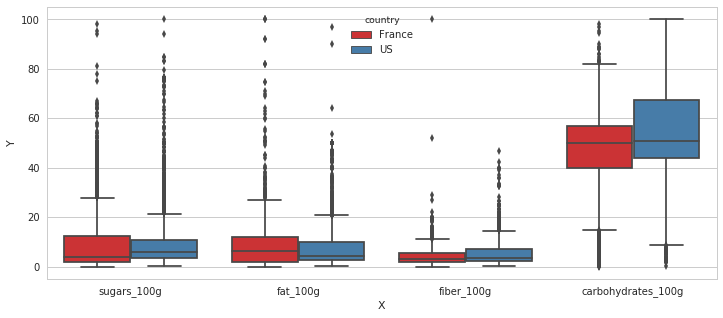

In [50]:
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.boxplot(x="X",y ="Y", hue="country", data=data_boxplot, palette="Set1")

With the boxplot we observe that the majority of the bread items have around 2-15 grams of sugar per 100g, which makes sense. Based on this plot it seems like the sugar levels are little bit lower for the bread in France compared to in the US, but the variance is bigger in France.

Carbohydrates are in general higher per 100g in the US.

In [17]:
custom_style_france_first = Style(
    background='transparent',
    plot_background='#FFFFFF',
    font_family='googlefont:Muli',
    title_font_size=14,
    opacity='.7',
    opacity_hover='.95',
    transition='400ms ease-in',
    colors=('#002395', '#B22234')
)

In [24]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Carbohydrates per 100g'

box_chart.add('France', breads_france['carbohydrates_100g'].dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('US', breads_usa['carbohydrates_100g'].dropna())
#box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
#box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('breads_carbs.svg')

In [25]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Fiber per 100g'

box_chart.add('France', breads_france['fiber_100g'].dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('US', breads_usa['fiber_100g'].dropna())
#box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
#box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('breads_fiber.svg')